## Carregando dados

In [1]:
import pandas as pd
df = pd.read_csv('../dados/dados_tratados.csv')
df.head()

,Ticker,DY,Nome,Categoria
0,AAGR11,0.00,ASSET BANK AGRONEGÓCIOS FIAGRO IMOBILIARIO,Fiagro
1,AAZQ11,16.45,-,Fiagro
2,ABCP11,8.62,Grand Plaza Shopping,Tijolo
3,AFCR11,0.00,-,Outros
4,AFHI11,12.89,AF INVEST CRI,Papel


## Dividend Yield

In [5]:
# dados estatísticos
df.DY.describe()

count     581.000000
mean       12.117022
std        69.559046
min         0.000000
25%         0.000000
50%         7.360000
75%        11.740000
max      1233.330000
Name: DY, dtype: float64

/home/escova/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


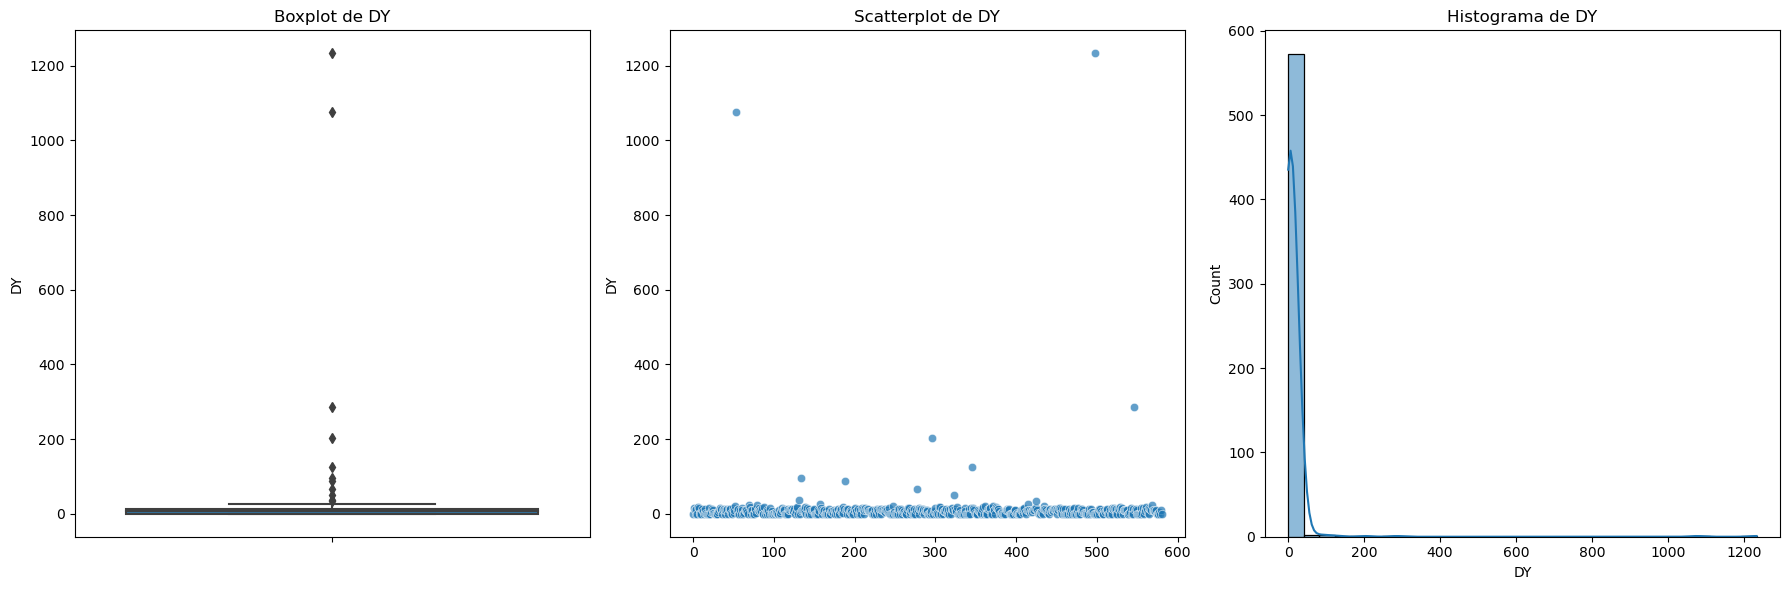

In [113]:
# representação gráfica dos dados
import matplotlib.pyplot as plt
import seaborn as sns


fig, axs = plt.subplots(1,3, figsize=(18,6))
sns.boxplot(y='DY',data=df, ax=axs[0])
axs[0].set_title('Boxplot de DY')

sns.scatterplot(x=df.index, y='DY', data=df, ax=axs[1], alpha=0.7)
axs[1].set_title('Scatterplot de DY')

sns.histplot(df['DY'], ax=axs[2], kde=True, bins=30)
axs[2].set_title('Histograma de DY')

plt.tight_layout()
plt.show()

## DY x Categoria

In [62]:
df.groupby('Categoria')['DY'].describe()

,count,mean,std,min,25%,50%,75%,max
Categoria,,,,,,,,
Fiagro,39.0,9.404872,7.691584,0.0,0.000,13.520,16.0600,18.74
Fundo Misto,151.0,16.413179,101.599846,0.0,0.000,3.560,11.5650,1233.33
Outros,94.0,1.330106,4.015283,0.0,0.000,0.000,0.0000,22.95
Papel,117.0,13.525641,27.954617,0.0,8.880,11.320,13.1200,285.71
Tijolo,180.0,13.818222,80.110486,0.0,2.405,8.375,10.5875,1077.02


In [44]:
# dy por categoria
df.groupby('Categoria')['DY'].count()

Categoria
Fiagro          39
Fundo Misto    151
Outros          94
Papel          117
Tijolo         180
Name: DY, dtype: int64

In [22]:
# dy por categoria sem fundos zerados
df.query('DY != 0').groupby('Categoria')['DY'].count()

Categoria
Fiagro          26
Fundo Misto     92
Outros          19
Papel          105
Tijolo         151
Name: DY, dtype: int64

In [31]:
# dy outliers 
df.query('DY < 36').groupby('Categoria')['DY'].count()

Categoria
Fiagro          39
Fundo Misto    146
Outros          94
Papel          115
Tijolo         177
Name: DY, dtype: int64

In [33]:
# dy sem fundos zerados e outliers
df.query('DY <= 36 and DY !=0').groupby('Categoria')['DY'].count()

Categoria
Fiagro          26
Fundo Misto     87
Outros          19
Papel          103
Tijolo         148
Name: DY, dtype: int64

In [61]:
# analise estatistica
df.query('DY !=0 & DY <= 36').groupby('Categoria')['DY'].describe()

,count,mean,std,min,25%,50%,75%,max
Categoria,,,,,,,,
Fiagro,26.0,14.107308,4.575111,0.94,13.5225,15.600,16.5325,18.74
Fundo Misto,87.0,9.537241,5.769143,0.09,6.1050,9.730,13.3750,33.31
Outros,19.0,6.580526,6.843214,0.36,0.9500,3.300,11.1450,22.95
Papel,103.0,11.384757,4.031420,0.45,9.6550,11.730,13.5250,25.95
Tijolo,148.0,8.684730,4.493231,0.05,5.9975,8.945,10.8700,25.44


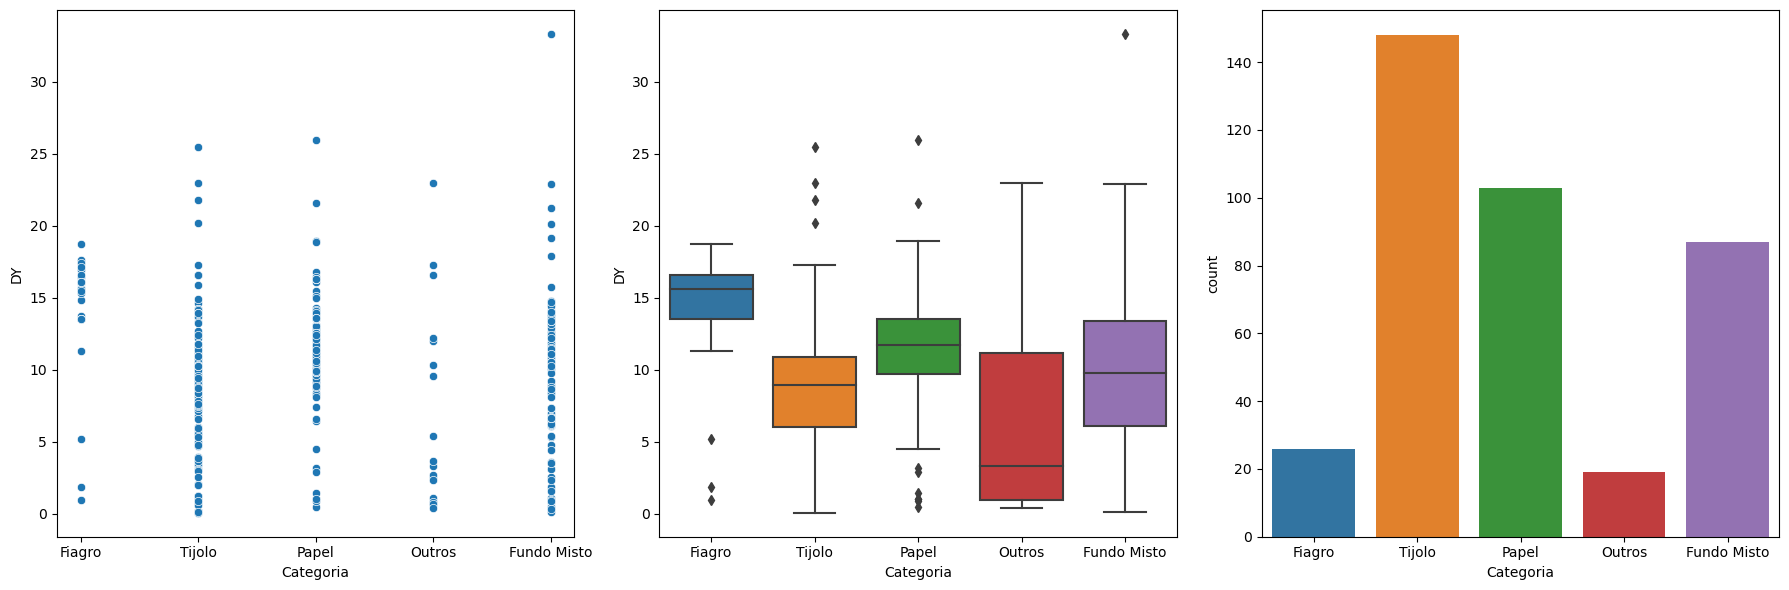

In [49]:
# representação gráfica

fig, axs = plt.subplots(1,3,figsize=(18,6))
sns.scatterplot(x='Categoria',y='DY',data=df.query('DY < 36 & DY !=0'),ax=axs[0])
sns.boxplot(x='Categoria', y='DY', data=df.query('DY !=0 and DY < 36'), ax=axs[1])
sns.countplot(x='Categoria',data=df.query('DY <= 36 and DY != 0'), ax=axs[2])
plt.tight_layout()
plt.show()


## Filtros

In [115]:
# estatistica sem valores zerados e outliers(dy acima de 36%)
df.query('DY <= 36 and DY != 0').groupby('Categoria')['DY'].describe()

,count,mean,std,min,25%,50%,75%,max
Categoria,,,,,,,,
Fiagro,26.0,14.107308,4.575111,0.94,13.5225,15.600,16.5325,18.74
Fundo Misto,87.0,9.537241,5.769143,0.09,6.1050,9.730,13.3750,33.31
Outros,19.0,6.580526,6.843214,0.36,0.9500,3.300,11.1450,22.95
Papel,103.0,11.384757,4.031420,0.45,9.6550,11.730,13.5250,25.95
Tijolo,148.0,8.684730,4.493231,0.05,5.9975,8.945,10.8700,25.44


In [121]:
# Top 10 DY

#df.query('DY <= 36 and DY != 0').sort_values('DY',ascending=False).head(10)
df.query('DY <= 36 and DY != 0').nlargest(10,'DY')

,Ticker,DY,Nome,Categoria
425,RBTS11,33.31,RB CAPITAL TFO SITUS FDO INV IMOB - FII,Fundo Misto
157,FEXC11,25.95,BTG Pactual Fundo de CRI,Papel
414,RBOP11,25.44,Mercantil do Brasil,Tijolo
79,BTHI11,22.95,-,Outros
568,XPHT11,22.95,XP HOTÉIS - FDO INV IMOB,Tijolo
69,BRIM11,22.88,BRIO REAL ESTATE II - FDO INV IMOB,Fundo Misto
361,ONEF11,21.76,The One,Tijolo
434,RDPD11,21.58,BB Renda de Papeis Imobiliários II,Papel
247,IDFI11,21.23,FII UNIDADES,Fundo Misto
52,BLMG11,20.20,BLUEMACAW LOGÍSTICA,Tijolo


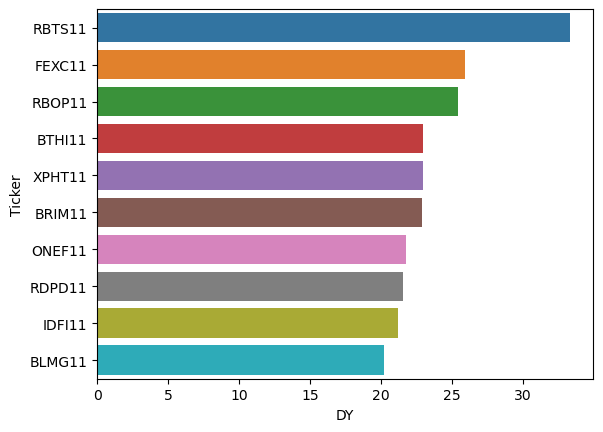

In [130]:
# top 10 graficamente
sns.barplot(x='DY',y='Ticker',data=df.query('DY <= 36 and DY != 0').nlargest(10,'DY'));

In [127]:
# top 5 por categoria
df.query('DY <= 36 and DY != 0').groupby('Categoria')['DY'].nlargest(5)

Categoria       
Fiagro       186    18.74
             306    17.64
             6      17.55
             359    17.42
             528    17.14
Fundo Misto  425    33.31
             69     22.88
             247    21.23
             371    20.08
             304    19.14
Outros       79     22.95
             561    17.29
             555    16.59
             347    12.20
             190    11.98
Papel        157    25.95
             434    21.58
             129    18.94
             375    18.88
             88     16.80
Tijolo       414    25.44
             568    22.95
             361    21.76
             52     20.20
             327    17.25
Name: DY, dtype: float64

In [169]:
# Top 5 por categoria
top_5_by_category = df.query('DY <= 36 and DY != 0').groupby('Categoria').apply(lambda x: x.nlargest(5, 'DY')).reset_index(drop=True)
top_5_by_category

,Ticker,DY,Nome,Categoria
0,GCRA11,18.74,-,Fiagro
1,LSAG11,17.64,-,Fiagro
2,AGRX11,17.55,-,Fiagro
3,OIAG11,17.42,-,Fiagro
4,VGIA11,17.14,-,Fiagro
5,RBTS11,33.31,RB CAPITAL TFO SITUS FDO INV IMOB - FII,Fundo Misto
6,BRIM11,22.88,BRIO REAL ESTATE II - FDO INV IMOB,Fundo Misto
7,IDFI11,21.23,FII UNIDADES,Fundo Misto
8,PATC11,20.08,PÁTRIA-EDIFÍCIOS-CORPORATIVOS-FDO-INV-IMOB,Fundo Misto
9,LPLP11,19.14,FII LAGO PDR,Fundo Misto
